In [14]:
import pandas as pd
from google.colab import files

# Upload the files
uploaded = files.upload()

# Load datasets
customers = pd.read_csv('dbo.proj_customers.csv')
sales = pd.read_csv('dbo.proj_sales.csv')
products = pd.read_csv('dbo.proj_products.csv')
stores = pd.read_csv('dbo.proj_stores.csv')

# Print column names to confirm correct columns
print("Customers Columns:", customers.columns)
print("Sales Columns:", sales.columns)
print("Products Columns:", products.columns)
print("Stores Columns:", stores.columns)


Saving dbo.proj_customers.csv to dbo.proj_customers (3).csv
Saving dbo.proj_data_dictionary.csv to dbo.proj_data_dictionary (3).csv
Saving dbo.proj_exchange.csv to dbo.proj_exchange (3).csv
Saving dbo.proj_products.csv to dbo.proj_products (3).csv
Saving dbo.proj_sales.csv to dbo.proj_sales (3).csv
Saving dbo.proj_stores.csv to dbo.proj_stores (3).csv
Customers Columns: Index(['CustomerKey', 'Gender', 'Name', 'City', 'State_Code', 'State',
       'Zip_Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')
Sales Columns: Index(['Order_Number', 'Line_Item', 'Order_Date', 'Delivery_Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency_Code'],
      dtype='object')
Products Columns: Index(['ProductKey', 'Product_Name', 'Brand', 'Color', 'Unit_Cost_USD',
       'Unit_Price_USD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category'],
      dtype='object')
Stores Columns: Index(['StoreKey', 'Country', 'State', 'Square_Meters', 'Open_Date'], dtype

In [15]:
# Merge datasets using appropriate keys
merged_data = sales.merge(customers, on='CustomerKey').merge(products, on='ProductKey').merge(stores, on='StoreKey')

# Check the column names of the merged dataframe
print("Merged Data Columns:", merged_data.columns)


Merged Data Columns: Index(['Order_Number', 'Line_Item', 'Order_Date', 'Delivery_Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency_Code',
       'Gender', 'Name', 'City', 'State_Code', 'State_x', 'Zip_Code',
       'Country_x', 'Continent', 'Birthday', 'Product_Name', 'Brand', 'Color',
       'Unit_Cost_USD', 'Unit_Price_USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category', 'Country_y', 'State_y', 'Square_Meters',
       'Open_Date'],
      dtype='object')


In [16]:
# Calculate profit for each sale
merged_data['Profit'] = merged_data['Unit_Price_USD'] - merged_data['Unit_Cost_USD']

# Check the first few rows to ensure data is correct
print(merged_data.head())


   Order_Number  Line_Item  Order_Date Delivery_Date  CustomerKey  StoreKey  \
0        366000          1  2016-01-01           NaN       265598        10   
1       1998016          1  2020-06-20           NaN       399053        10   
2       1730028          2  2019-09-26           NaN       245143        10   
3       2214002          4  2021-01-22           NaN       384783        10   
4       1394030          5  2018-10-25           NaN       397223        10   

   ProductKey  Quantity Currency_Code  Gender  ... Unit_Price_USD  \
0        1304         1           CAD    Male  ...          68.00   
1          87         5           CAD  Female  ...          99.99   
2          87         6           CAD  Female  ...          99.99   
3        1619         5           CAD    Male  ...          59.99   
4          52         1           CAD    Male  ...         199.95   

  SubcategoryKey                       Subcategory CategoryKey  \
0            406  Cameras & Camcorders Acces

In [21]:
# Convert Order_Date to datetime
merged_data['Order_Date'] = pd.to_datetime(merged_data['Order_Date'])

# Extract quarter and year
merged_data['Quarter'] = merged_data['Order_Date'].dt.to_period('Q')
merged_data['Year'] = merged_data['Order_Date'].dt.year

# Aggregate profit by country and quarter
quarterly_profit = merged_data.groupby(['Country_y', 'Year', 'Quarter'])['Profit'].sum().reset_index()
print(quarterly_profit.head())


   Country_y  Year Quarter    Profit
0  Australia  2016  2016Q1  19438.15
1  Australia  2016  2016Q2   9063.65
2  Australia  2016  2016Q3  10272.23
3  Australia  2016  2016Q4  11943.57
4  Australia  2017  2017Q1  12459.10


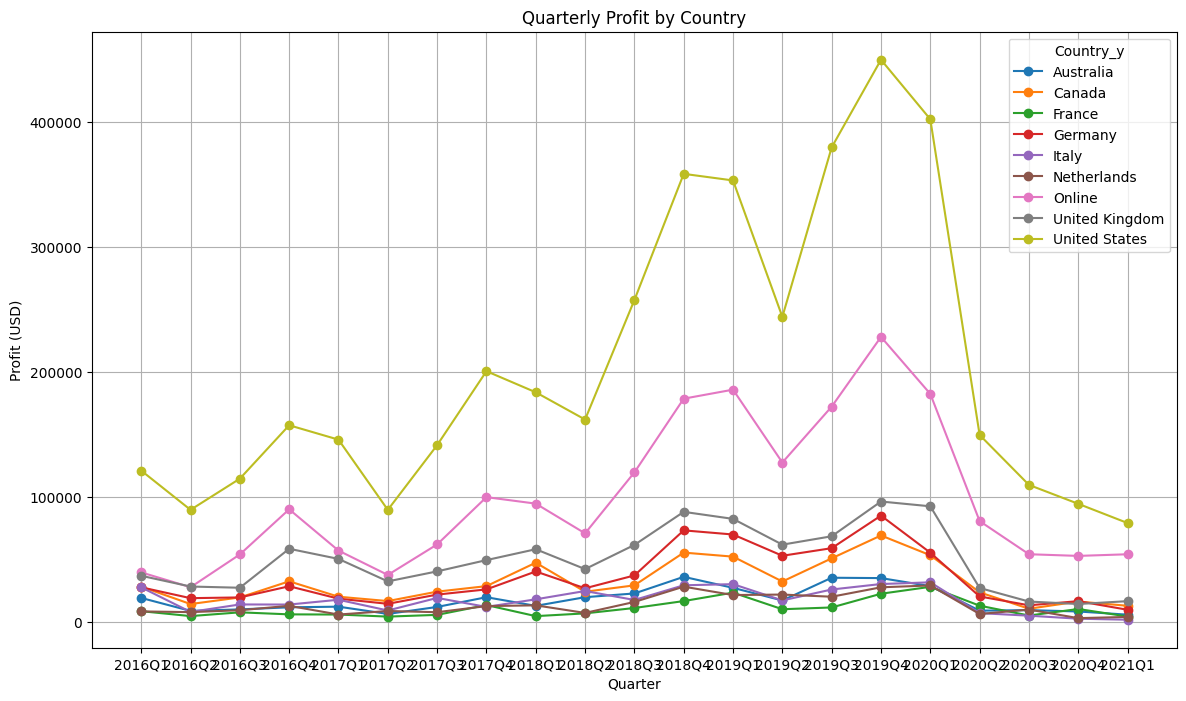

In [25]:
import matplotlib.pyplot as plt

# Plot quarterly profit by country
plt.figure(figsize=(14, 8))
for country in quarterly_profit['Country_y'].unique():
    country_data = quarterly_profit[quarterly_profit['Country_y'] == country]
    plt.plot(country_data['Quarter'].astype(str), country_data['Profit'], marker='o', label=country)

plt.title('Quarterly Profit by Country')
plt.xlabel('Quarter')
plt.ylabel('Profit (USD)')
plt.legend(title='Country_y')
plt.grid(True)
plt.show()


In [26]:
# Aggregate profit by product
product_profit = merged_data.groupby('Product_Name')['Profit'].sum().reset_index()

# Sort by profit to find top-selling products
top_products = product_profit.sort_values(by='Profit', ascending=False).head(10)
print(top_products)


                                     Product_Name    Profit
244    Adventure Works Desktop PC2.33 XD233 Black  97840.45
2381               WWI Desktop PC2.33 X2330 Black  94636.08
246   Adventure Works Desktop PC2.33 XD233 Silver  94600.70
245    Adventure Works Desktop PC2.33 XD233 Brown  93304.80
2382               WWI Desktop PC2.33 X2330 Brown  92792.52
247    Adventure Works Desktop PC2.33 XD233 White  92008.90
2383              WWI Desktop PC2.33 X2330 Silver  87261.84
174       Adventure Works 52" LCD HDTV X590 Black  85323.48
2384               WWI Desktop PC2.33 X2330 White  80502.12
177       Adventure Works 52" LCD HDTV X590 White  77566.80


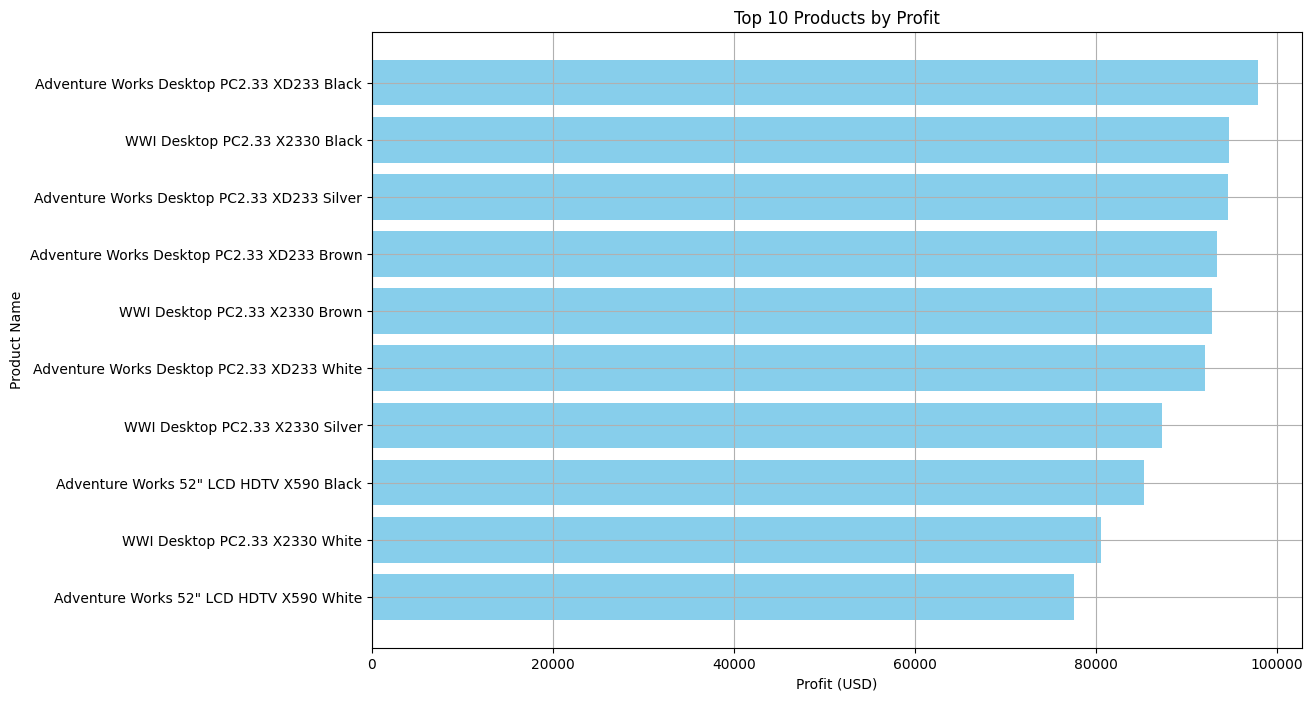

In [27]:
# Plot top-selling products by profit
plt.figure(figsize=(12, 8))
plt.barh(top_products['Product_Name'], top_products['Profit'], color='skyblue')
plt.xlabel('Profit (USD)')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Profit')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


        Country_y      Profit
8   United States  4287575.22
6          Online  2074240.15
7  United Kingdom  1054992.03
3         Germany   740966.15
1          Canada   667106.63


<ipython-input-31-c97aa17dd3d4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Country_y', data=top_countries, palette='viridis')


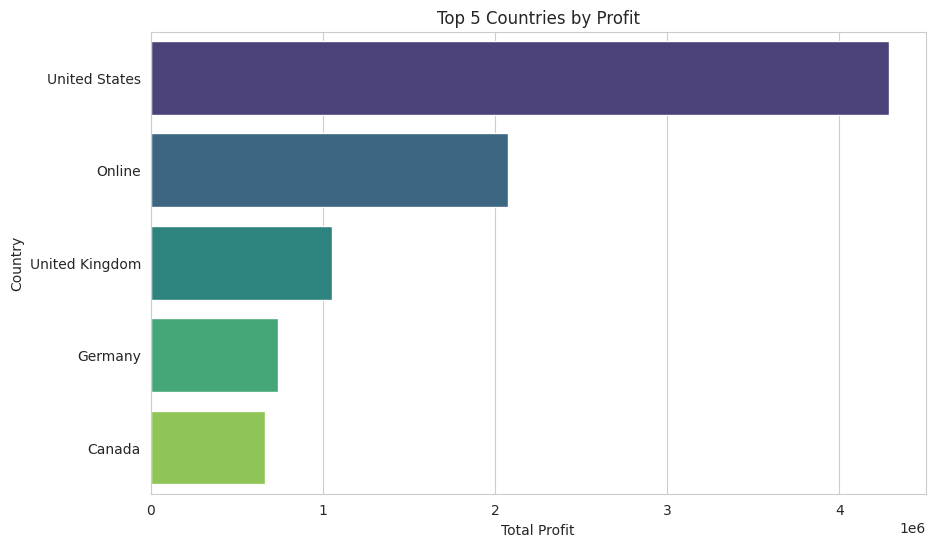

In [31]:
import seaborn as sns
# Aggregate profit by country
country_profit = merged_data.groupby('Country_y')['Profit'].sum().reset_index()

# Sort by profit to identify top countries
top_countries = country_profit.sort_values(by='Profit', ascending=False).head(5)
print(top_countries)


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Country_y', data=top_countries, palette='viridis')

# Add a title and labels
plt.title('Top 5 Countries by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')

# Show the plot
plt.show()


       Country_y  Year Quarter   Profit
104        Italy  2021  2021Q1  2015.04
103        Italy  2020  2020Q4  2826.79
124  Netherlands  2020  2020Q4  3285.05
125  Netherlands  2021  2021Q1  4240.74
47        France  2017  2017Q2  4508.39
62        France  2021  2021Q1  4574.86
50        France  2018  2018Q1  4886.16
43        France  2016  2016Q2  4922.65
102        Italy  2020  2020Q3  5246.92
60        France  2020  2020Q3  5370.70
48        France  2017  2017Q3  5891.22
20     Australia  2021  2021Q1  6044.39
109  Netherlands  2017  2017Q1  6146.27
46        France  2017  2017Q1  6156.47
45        France  2016  2016Q4  6299.32
122  Netherlands  2020  2020Q2  6592.17
5      Australia  2017  2017Q2  6644.52
51        France  2018  2018Q2  7086.97
101        Italy  2020  2020Q2  7287.50
114  Netherlands  2018  2018Q2  7452.14


<ipython-input-41-cc904d88f3f2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profit', y='Country_y', data=lowest_20_quarters, palette='viridis')


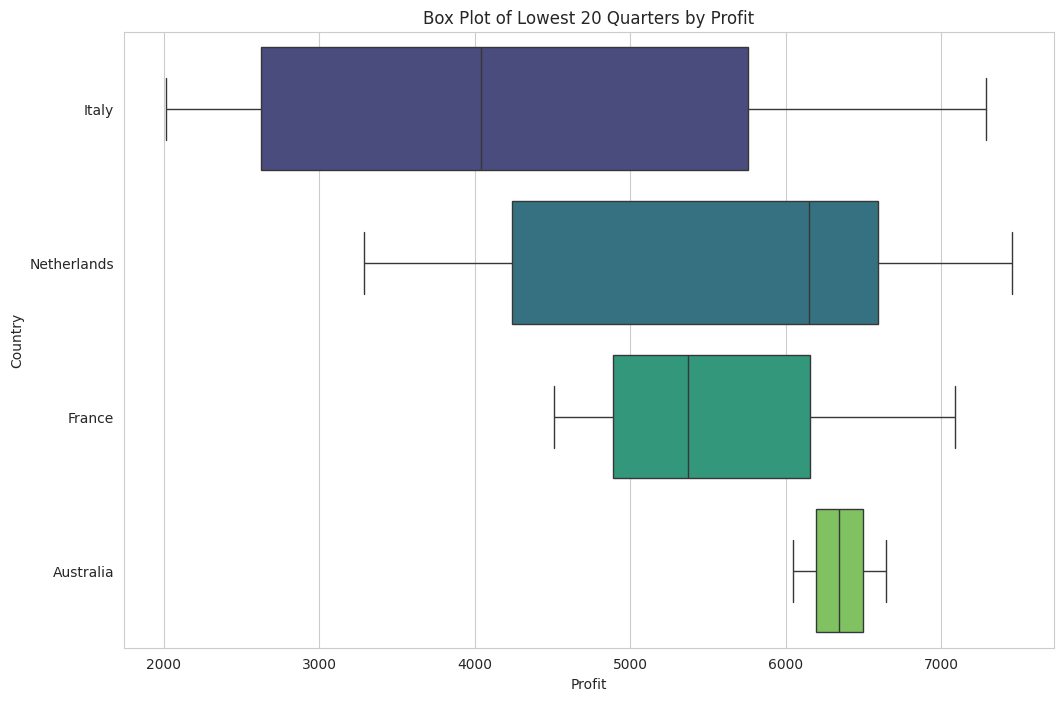

In [41]:
# Aggregate profit by country and quarter
quarterly_profit = merged_data.groupby(['Country_y', 'Year', 'Quarter'])['Profit'].sum().reset_index()


# Sort by profit to identify the lowest 5 quarters
lowest_20_quarters = low_profit_quarters.sort_values(by='Profit').head(20)
print(lowest_20_quarters)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a box plot for the lowest 20 quarters
plt.figure(figsize=(12, 8))
sns.boxplot(x='Profit', y='Country_y', data=lowest_20_quarters, palette='viridis')

# Add a title and labels
plt.title('Box Plot of Lowest 20 Quarters by Profit')
plt.xlabel('Profit')
plt.ylabel('Country')

# Show the plot
plt.show()
